# [從FMP的document API下載財務數據](https://financialmodelingprep.com/developer/docs/)

In [1]:
from urllib.request import urlopen
import json
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline
pd.set_option('display.max_rows', 999), pd.set_option('display.max_columns', 999), pd.set_option('display.width', 999)    

# 輸入股號
ticker = 'AAPL' 

# 官網推薦的財務指標
key = urlopen('https://financialmodelingprep.com/api/v3/company-key-metrics/'+ ticker +'?period=quarter')

# 損益表
inc = urlopen('https://financialmodelingprep.com/api/v3/financials/income-statement/'+ ticker +'?period=quarter')

# 資產負債表
bs = urlopen('https://financialmodelingprep.com/api/v3/financials/balance-sheet-statement/'+ ticker +'?period=quarter')

# 現金流量表
cfs = urlopen('https://financialmodelingprep.com/api/v3/financials/cash-flow-statement/'+ ticker +'?period=quarter')

# 資產負債表
pri = urlopen('https://financialmodelingprep.com/api/v3/historical-price-full/'+ticker+'?serietype=line')

def key_ratio(data):
    return json.loads(data.read().decode("utf-8"))

dic = key_ratio(key) 
df_key = pd.DataFrame(dic['metrics'], index= range(len(dic['metrics'])))[::-1]
dic = key_ratio(inc) 
df_inc = pd.DataFrame(dic['financials'], index= range(len(dic['financials'])))[::-1]
dic = key_ratio(bs) 
df_bs = pd.DataFrame(dic['financials'], index= range(len(dic['financials'])))[::-1]
dic = key_ratio(cfs) 
df_cfs = pd.DataFrame(dic['financials'], index= range(len(dic['financials'])))[::-1]
dic = key_ratio(pri) 
df_pri = pd.DataFrame(dic['historical'], index= range(len(dic['historical'])))

one = pd.merge( df_key, df_inc, on ='date')
two = pd.merge( df_bs, df_cfs, on ='date')
df = pd.merge( one, two, on ='date').tail(13) # 把4個出處的財務數據合拼成一個dataframe，只取最近13季
df.set_index('date',inplace=True)

# 匯出後再匯入
df.to_csv('example.csv')
df = pd.read_csv('example.csv',index_col='date')
df.sort_values(by = df.index[-1], ascending= False, axis= 1, inplace=True)
df

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Enterprise Value,Market Cap,Total assets,Total liabilities,Total non-current assets,Investments,Total non-current liabilities,Total current assets,Total debt,Long-term investments,Total current liabilities,Cash and short-term investments,Long-term debt,Total shareholders equity,Net Debt,Revenue,Short-term investments,Working Capital,Other comprehensive income,Cash and cash equivalents,Average Payables,Cost of Revenue,"Property, Plant & Equipment Net",Retained earnings (deficit),Payables,Gross Profit,Average Receivables,Receivables,EBITDA,Operating Cash Flow,Earnings before Tax,Operating Income,EBIT,Free Cash Flow,Net Income,Net Income Com,Consolidated Income,Short-term debt,Operating Expenses,Investing Cash flow,Deferred revenue,SG&A Expense,R&D Expenses,Weighted Average Shs Out (Dil),Weighted Average Shs Out,Average Inventory,Inventories,Depreciation & Amortization,Income Tax Expense,Capital Expenditure,Stock-based compensation,Net cash flow / Change in cash,Interest Expense,EV to Free cash flow,PE ratio,PFCF ratio,EV to Operating cash flow,POCF ratio,Enterprise Value over EBITDA,Tangible Book Value per Share,Graham Number,Capex to Revenue,Interest Debt per Share,EV to Sales,Price to Sales Ratio,Book Value per Share,Shareholders Equity per Share,Interest Coverage,PB ratio,PTB ratio,Revenue per Share,Cash per Share,Capex to Operating Cash Flow,Net Debt to EBITDA,Debt to Equity,Operating Cash Flow per Share,Free Cash Flow per Share,EPS,EPS Diluted,Net Income per Share,Capex to Depreciation,Current ratio,Income Quality,Dividend per Share,Debt to Assets,Capex per Share,Gross Margin,Payout Ratio,EBITDA Margin,Earnings Before Tax Margin,EBIT Margin,Free Cash Flow margin,Net Profit Margin,Profit Margin,SG&A to Revenue,R&D to Revenue,Stock-based compensation to Revenue,Free Cash Flow Yield,Earnings Yield,Dividend Yield,Other Assets,Other Liabilities,Effect of forex changes on cash,Preferred Dividends,Deposit Liabilities,Net Income - Non-Controlling int,Intangibles to Total Assets,Tax Liabilities,Net Cash/Marketcap,Net Income - Discontinued ops,Goodwill and Intangible Assets,Tax assets,Revenue Growth,Graham Net-Net,Acquisitions and disposals,Dividend payments,Issuance (repayment) of debt,Investment purchases and sales,Issuance (buybacks) of shares,Financing Cash Flow,Net Current Asset Value,Tangible Asset Value,Invested Capital
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-04-01,8.447101e+11,7.713371e+11,3.345320e+11,2.004500e+11,2.325420e+11,2.416840e+11,1.271080e+11,1.019900e+11,8.853000e+10,1.897400e+11,7.334200e+10,6.710100e+10,8.453100e+10,1.340820e+11,7.337300e+10,5.289600e+10,5.194400e+10,2.864800e+10,28373185000,1.515700e+10,3.684200e+10,3.230500e+10,2.716300e+10,1.009250e+11,2.857300e+10,2.059100e+10,1.627450e+10,1.157900e+10,1.642900e+10,1.252300e+10,1.468400e+10,1.409700e+10,1.409700e+10,9.508000e+09,1.102900e+10,1.102900e+10,1.102900e+10,3.999000e+09,6.494000e+09,-1.420200e+10,7.682000e+09,3.718000e+09,2.776000e+09,5.294841e+09,5.262226e+09,3.503500e+09,2.910000e+09,2.332000e+09,3.655000e+09,3.015000e+09,1.217000e+09,-1.214000e+09,5.300000e+08,88.842037,69.937174,81.125062,67.452694,61.593635,51.415794,62.034964,34.663712,17.544279,16.924397,15.969262,14.582144,25.480092,25.480092,26.598113,5.752727,5.752727,10.052020,2.880340,4.153566,4.466066,1.494981,2.379791,1.806840,2.12,2.10,2.095881,0.773466,1.390608,1.135461,0.567345,0.599195,0.572951,0.389273,0.272373,0.310591,0.277601,0.266504,0.180505,0.208503,0.208503,0.070289,0.070289,0.023007,0.012327,0.014299,0.003895,0.0,0.0,0.0,0.0,0.0,0.0,0.024183,0.0,0.0,0.0,8.090000e+09,0.0,-0.324884,-23.413998,-50000000.0,-3.004000e+09,0.000000e+00,-1.257000e+09,-6.888000e+09,4.650000e+08,-9.846000e+10,1.259920e+11,3.364650e+11
2017-07-01,8.571104e+11,7.793224e+11,3.451730e+11,2.127480e+11,2.322980e+11,2.429450e+11,1.314460e+11,1.128750e+11,9.635900e+10,1.847570e+11,8.130200e+10,7.675900e+10,8.98640

,EV to Free cash flow,PE ratio,PFCF ratio,EV to Operating cash flow,POCF ratio,Enterprise Value over EBITDA,Tangible Book Value per Share,Graham Number,Capex to Revenue,Interest Debt per Share,EV to Sales,Price to Sales Ratio,Book Value per Share,Shareholders Equity per Share,Interest Coverage,PB ratio,PTB ratio,Revenue per Share,Cash per Share,Capex to Operating Cash Flow,Net Debt to EBITDA,Debt to Equity,Operating Cash Flow per Share,Free Cash Flow per Share,EPS,EPS Diluted,Net Income per Share,Capex to Depreciation,Current ratio,Income Quality,Dividend per Share,Debt to Assets,Capex per Share,Gross Margin,Payout Ratio,EBITDA Margin,Earnings Before Tax Margin,EBIT Margin,Free Cash Flow margin,Net Profit Margin,Profit Margin,SG&A to Revenue,R&D to Revenue,Stock-based compensation to Revenue,Free Cash Flow Yield,Earnings Yield,Dividend Yield,Revenue Growth,Graham Net-Net,price
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-03-30,116.628389,83.269509,109.494859,91.922617,86.300206,62.315211,72.689054,35.269585,24.551418,21.618956,17.674684,16.593619,22.499732,22.499732,13.282178,9.093886,9.093886,12.330644,8.074058,4.720694,3.811486,2.230663,2.370910,1.868672,2.48,2.48,2.457202,1.286500,1.315382,0.964882,0.726839,0.690466,0.502238,0.376127,0.297812,0.283634,0.237749,0.231233,0.151547,0.199276,0.199276,0.076842,0.076842,0.026097,0.009133,0.012009,0.003576,-0.311885,-30.242702,189.95
2019-06-29,106.380292,97.286489,101.405718,88.095608,83.976065,70.807522,69.147403,31.681593,26.904500,21.314865,19.050354,18.159518,20.697935,20.697935,13.330254,10.130479,10.130479,11.546562,10.842940,5.818000,3.311114,2.340788,2.496902,2.067734,2.22,2.20,2.155284,1.466500,1.504649,1.158503,0.773484,0.700669,0.429168,0.375904,0.361310,0.269044,0.221357,0.214537,0.179078,0.186660,0.186660,0.082254,0.082254,0.027802,0.009861,0.010279,0.003714,-0.072498,-25.509879,197.92
2019-09-28,70.232566,84.032702,67.126105,60.436693,57.763514,63.991414,73.306230,36.148202,23.060857,22.278194,18.789734,17.958644,19.595334,19.595334,19.290123,12.709658,12.709658,13.867974,10.577253,7.169607,2.830408,2.741004,4.311545,3.710181,3.05,3.03,2.963727,1.144761,1.540126,1.454771,0.748347,0.732692,0.601364,0.379653,0.254201,0.293629,0.251827,0.243988,0.267536,0.213710,0.213710,0.071487,0.071487,0.023407,0.014897,0.011900,0.003025,0.190135,-27.767022,218.82
2019-12-28,50.250189,61.343165,48.013890,46.780627,44.698735,50.292676,77.149471,47.937090,43.578073,23.575551,15.547519,14.855603,20.278638,20.278638,32.571975,15.235244,15.235244,20.796867,9.008072,14.483151,2.238189,2.804470,6.911829,6.434596,5.04,4.99,5.036421,1.336497,1.597782,1.372369,0.794459,0.737151,0.477232,0.383548,0.159156,0.309141,0.282273,0.278472,0.309402,0.242172,0.242172,0.056600,0.056600,0.018624,0.020827,0.016302,0.002595,0.433776,-28.572561,289.80
2020-03-28,113.609024,110.447880,108.433252,97.793719,93.338457,83.236281,73.024476,32.110822,31.469509,22.845220,22.323190,21.306196,17.874359,17.874359,16.978864,15.842247,15.842247,13.290500,9.156321,7.183486,3.792058,3.085432,3.033798,2.611468,2.59,2.57,2.563834,1.503508,1.495962,1.183305,0.761912,0.755228,0.422329,0.383619,0.300027,0.268191,0.225250,0.220414,0.196491,0.192907,0.192907,0.084921,0.084921,0.029102,0.009222,0.009054,0.002716,-0.364914,-30.646918,247.74


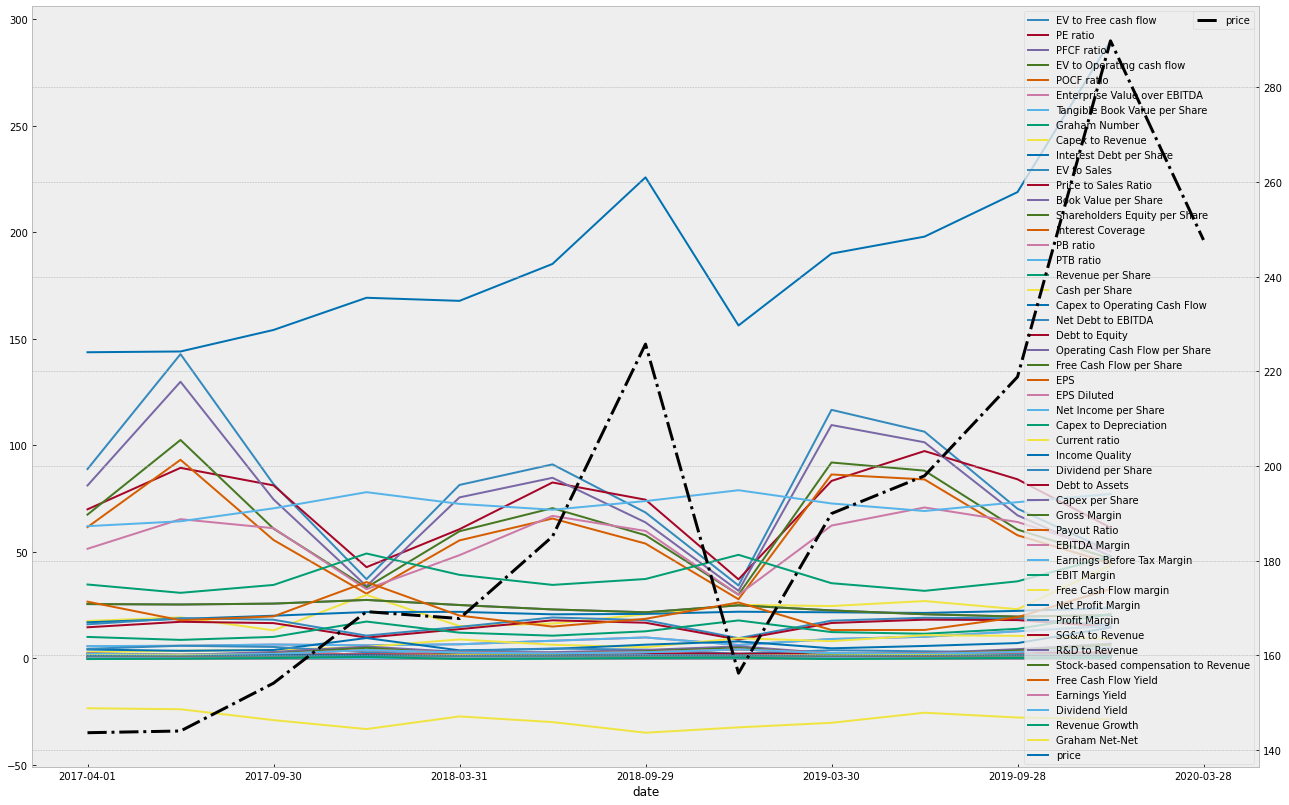

In [2]:
# 以各欄平均值為標準，數值太大的先刪去(單位大多為金額)，留下值比適中的欄位(單位大多為百分比)
df1 = df[df.columns[df.describe().loc['mean'].between(-100,200)]] 
# 刪去值為0的欄位
df1 = df1[~df1.isin([0])].dropna(axis=1)
df_pri = df_pri.set_index('date')

# 新增股價位欄，為季報公佈前的最後一個交易日收盤價
df1['price'] = 0.
for i in range(len(df)):
    df1['price'][i] = df_pri.loc[:df1.index[i]][-1:].values[0][0]
display(df1.tail())

# 分析這些財務數據與右邊y軸的(股價)的關係
df1[:-1].plot(figsize= (22,14))
df1['price'].plot(secondary_y= True, ls='-.', c= 'k', lw= 3)
plt.legend(loc= 0)